In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
#F-cja leidžianti pakeisti žanro pavadinim
def genre_repl(x, y):
    df_games['genres'] = df_games.genres.str.replace(x, y)

In [3]:
#F-cja piešianti boxplot, kur column_x yra norimas stulpelis x reikšmėm, column_y yra norimas stulpelis y reikšmėm,
#dtf yra iš kokio dataframe stulpelius imti
def box_plt(column_x, column_y, dtf):
    plt.figure(figsize=(15,6))
    sns.boxplot(x=column_x, y=column_y, data = dtf)
    plt.xticks(rotation=30)


## Kokie parametrai leis sukurti ir išleisti gerai įvertinta  žaidimą
i koki zanra verta investuoti

In [4]:
df_games = pd.read_csv("data/metacritic_games.csv")
#df_games.head()

*susitvarkome duomenys
išsiemame sklaiustelius iš genres stulpelio
pasikeičiame releasedate iš int į datatime 


In [5]:
df_games = df_games.drop(['developer','publisher','attribute', 'link', 'critic_positive', 'critic_neutral', 'critic_negative',
'user_positive', 'user_neutral', 'user_negative'],axis=1)

df_games = df_games.rename(columns={"genre(s)": "genres"})
df_games = df_games.dropna(subset=['genres'])

df_games = df_games.dropna(subset=['release_date'])
df_games['release_date'] = pd.to_datetime(df_games.release_date)

df_games = df_games.dropna(subset=['user_score'])
df_games.drop(df_games[df_games['user_score'] == 'tbd'].index, inplace = True)
df_games['user_score'] = df_games.user_score.astype('float64')

df_games


,name,platform,genres,players,rating,release_date,metascore,user_score
0,Command & Conquer,PC,Sci-Fi,1-4,T,1995-08-31,94,8.9
1,Full Throttle,PC,Adventure,NaN,NaN,1995-04-30,86,8.7
2,Battle Arena Toshinden,PS,Action,1-2,T,1995-09-09,69,5.8
3,Sid Meier's Civilization II,PC,Strategy,1 Player,K-A,1996-02-29,94,8.9
4,Quake,PC,Action,1-16,M,1996-06-22,94,8.8
...,...,...,...,...,...,...,...,...
20416,Shaq Fu: A Legend Reborn,PC,Action,No Online Multiplayer,T,2018-06-05,30,6.7
20417,ARK: Survival Evolved,Switch,Action Adventure,Online Multiplayer,T,2018-11-30,29,2.4
20418,Wild West Online,PC,Role-Playing,Online Multiplayer,NaN,2018-05-10,29,0.4
20419,The Quiet Man,PS4,Action Adventure,No Online Multiplayer,M,2018-11-01,28,2.1


In [6]:
for i in ['2D', '3D', '4X',  'Arcade', 'Dancing', 'Edutainment', 'GT / Street', 'Historic', 'Horror', 'Japanese-Style',
          'Military', 'Music Maker', 'Music', 'Party', 'Rail', 'Scrolling','Turn-Based', 'Tycoon', 'Virtual Life','WWII', 
          'WWI', 'Wargame', 'Western-Style', 'Compilation', 'Board Games', 'Card Battle', 'Real-Time', 'MOBA', 
          'Massively Multiplayer Online', 'Platformer', 'Traditional']:
    genre_repl(i, 'Other')
for i in ['Action RPG', 'Console-style RPG', 'PC-style RPG', 'Third-Person', 'First-Person']:
    genre_repl(i, 'Role-Playing')
for i in ['Formula One', 'Racing', 'Rally / Offroad']:
    genre_repl(i, "Driving")
for i in ["Beat-'Em-Up", 'Street', 'Fighting']:
    genre_repl(i, "Action")
for i in ['Breeding/Constructing', 'City Building', 'Flight', 'Simulation']:
    genre_repl(i, 'Sim')
for i in ['Ice Hockey', 'Olympic Sports']:
    genre_repl(i, 'Sports')
genre_repl('Tactical', 'Strategy')
genre_repl('Alternative', 'Miscellaneous')


*sukuriame žanrų sąrašą

In [7]:
df_games = df_games.dropna(subset=['genres'])
genre_list = df_games.genres
genre_list = set(genre_list)
genre_list = sorted(genre_list)
print(genre_list)

['Action', 'Action Adventure', 'Adventure', 'Driving', 'Fantasy', 'General', 'Miscellaneous', 'Modern', 'Other', 'Puzzle', 'Role-Playing', 'Sci-Fi', 'Shooter', 'Sim', 'Sports', 'Strategy']


In [8]:
total= []
for i in genre_list:
    a=df_games.genres.apply(lambda x: i in x)
    total.append([i, a.sum()])
total = pd.DataFrame(total, columns = ['genre','Sum'])
total = total.sort_values(by='Sum', ascending=False)
#total = total.loc[total.Sum < 30]

total

,genre,Sum
0,Action,8376
2,Adventure,3139
1,Action Adventure,2126
10,Role-Playing,1767
14,Sports,1557
15,Strategy,1476
6,Miscellaneous,1177
3,Driving,1143
13,Sim,548
5,General,235


In [9]:
bst_genre=list(total.genre)

In [10]:
df_games_cp = df_games.copy()
for genre in bst_genre:
    df_games_cp[genre] = df_games_cp.genres.apply(lambda x: genre in x)
df_games_cp

,name,platform,genres,players,rating,release_date,metascore,user_score,Action,Adventure,...,Miscellaneous,Driving,Sim,General,Other,Puzzle,Sci-Fi,Fantasy,Modern,Shooter
0,Command & Conquer,PC,Sci-Fi,1-4,T,1995-08-31,94,8.9,False,False,...,False,False,False,False,False,False,True,False,False,False
1,Full Throttle,PC,Adventure,NaN,NaN,1995-04-30,86,8.7,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Battle Arena Toshinden,PS,Action,1-2,T,1995-09-09,69,5.8,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Sid Meier's Civilization II,PC,Strategy,1 Player,K-A,1996-02-29,94,8.9,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Quake,PC,Action,1-16,M,1996-06-22,94,8.8,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20416,Shaq Fu: A Legend Reborn,PC,Action,No Online Multiplayer,T,2018-06-05,30,6.7,True,False,...,False,False,False,False,False,False,False,False,False,False
20417,ARK: Survival Evolved,Switch,Action Adventure,Online Multiplayer,T,2018-11-30,29,2.4,True,True,...,False,False,False,False,False,False,False,False,False,False
20418,Wild West Online,PC,Role-Playing,Online Multiplayer,NaN,2018-05-10,29,0.4,False,False,...,False,False,False,False,False,False,False,False,False,False
20419,The Quiet Man,PS4,Action Adventure,No Online Multiplayer,M,2018-11-01,28,2.1,True,True,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df_games_cp[bst_genre] = df_games_cp[bst_genre].astype(int)

In [12]:
genres_for_plt = df_games_cp[['release_date', 'Action', 'Adventure', 'Action Adventure', 
                              'Role-Playing', 'Sports', 'Strategy', 'Miscellaneous', 'Driving', 'Sim', 'General', 
                              'Other', 'Puzzle', 'Sci-Fi', 'Fantasy', 'Modern', 'Shooter']] 
genres_for_plt

,release_date,Action,Adventure,Action Adventure,Role-Playing,Sports,Strategy,Miscellaneous,Driving,Sim,General,Other,Puzzle,Sci-Fi,Fantasy,Modern,Shooter
0,1995-08-31,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1995-04-30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1995-09-09,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1996-02-29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1996-06-22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20416,2018-06-05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20417,2018-11-30,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20418,2018-05-10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
20419,2018-11-01,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
a = genres_for_plt.resample('Y', on ='release_date').sum()
#a

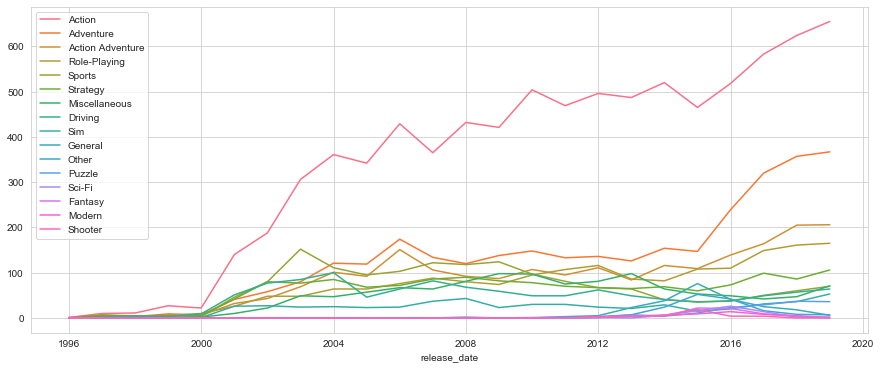

In [45]:
plt.figure(figsize=(15,6))
sns.lineplot(data=a, dashes=False)

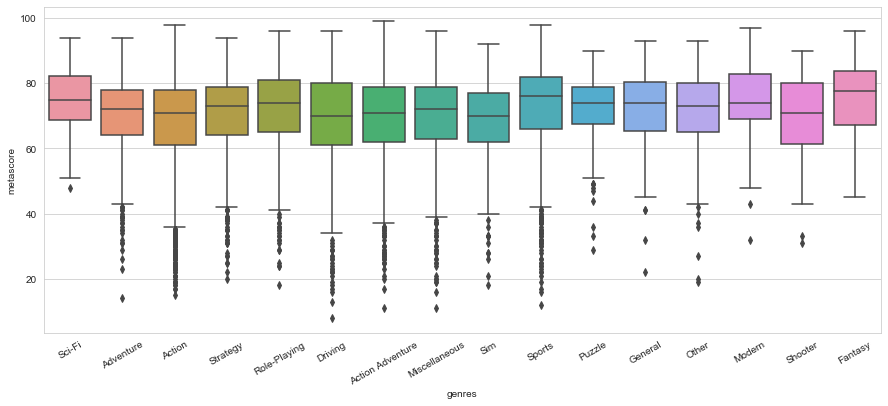

In [15]:
box_plt('genres', 'metascore', df_games)

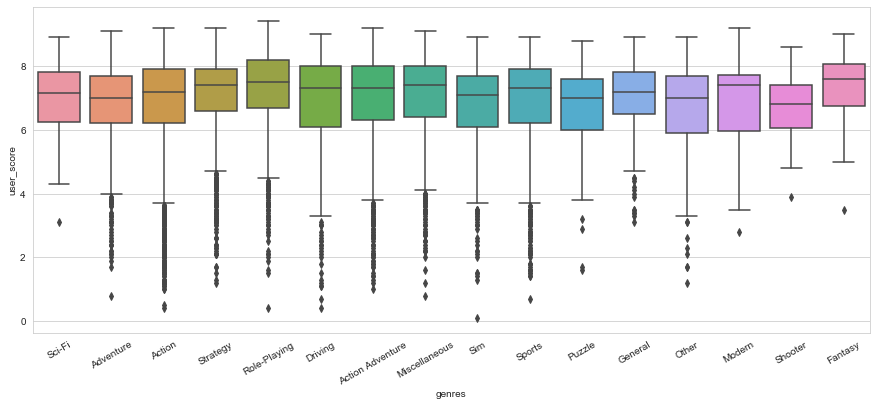

In [16]:
box_plt('genres', 'user_score', df_games)

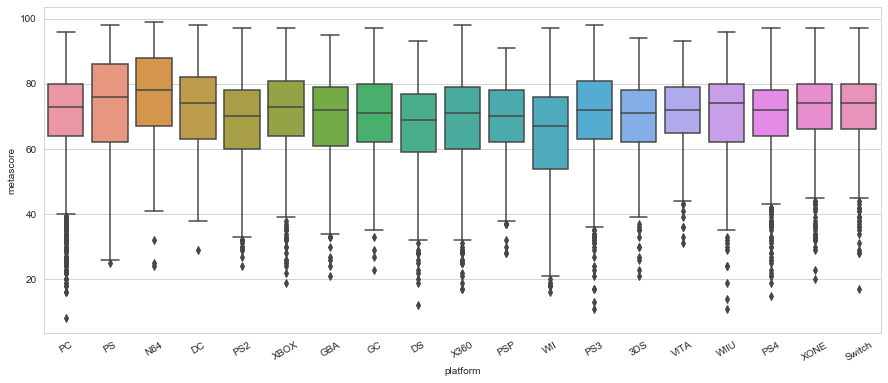

In [17]:
box_plt('platform', 'metascore', df_games)

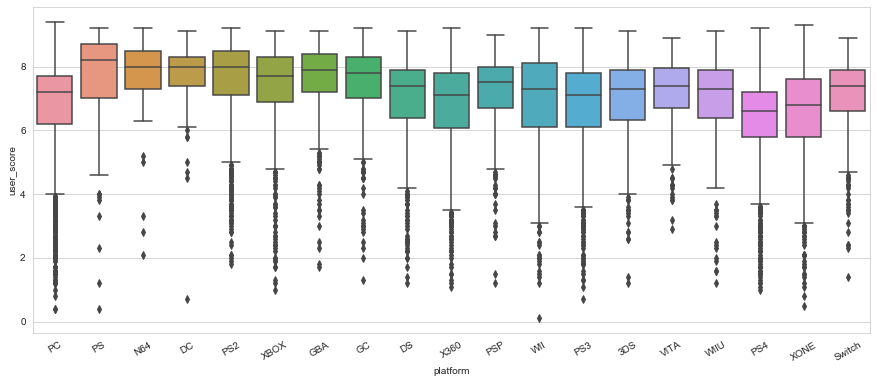

In [18]:
box_plt('platform', 'user_score', df_games)

In [19]:
genres_platform_plt = df_games_cp[['platform', 'Action', 'Adventure', 'Action Adventure', 'Role-Playing', 'Sports', 
                                    'Strategy', 'Miscellaneous', 'Driving', 'Sim', 'General', 'Other', 'Puzzle',
                                   'Sci-Fi', 'Fantasy', 'Modern', 'Shooter']] 

In [20]:
genres_platform_plt = genres_platform_plt.groupby(['platform']).sum()

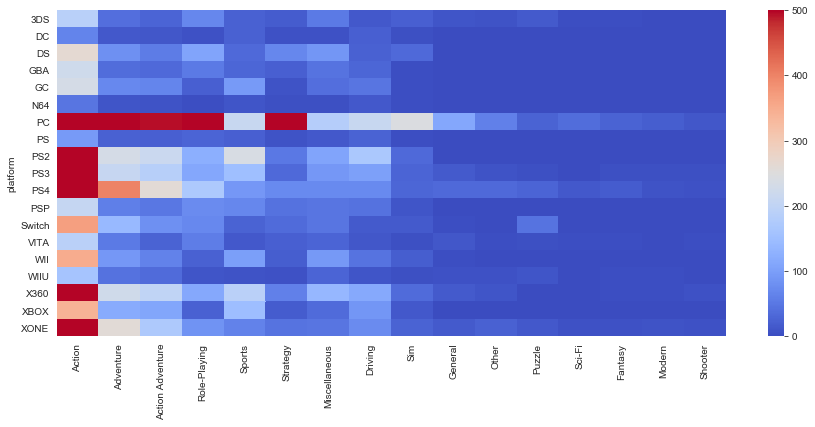

In [21]:
plt.figure(figsize=(15,6))
sns.heatmap(data=genres_platform_plt, vmax=500, cmap='coolwarm')

In [22]:
mean_to_plt = df_games.copy()
mean_to_plt['metascore'] = mean_to_plt.metascore/10
mean_to_plt = mean_to_plt.groupby('genres').mean()
mean_to_plt

,metascore,user_score
genres,,
Action,6.856640,6.864512
Action Adventure,6.971214,7.007103
Adventure,6.969003,6.787562
Driving,6.866054,6.918635
Fantasy,7.509091,7.357576
General,7.210638,7.031064
Miscellaneous,6.962447,7.009261
Modern,7.412500,6.808333
Other,7.034395,6.580255


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

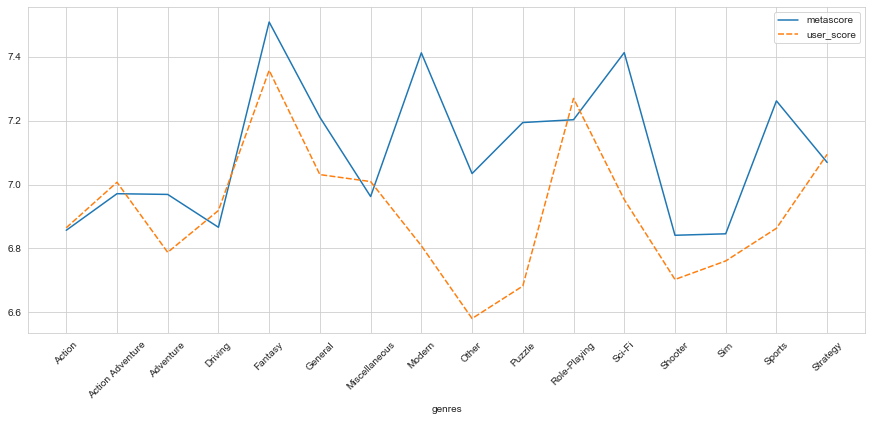

In [23]:
plt.figure(figsize=(15,6))
sns.lineplot(data=mean_to_plt)
plt.xticks(rotation=45)

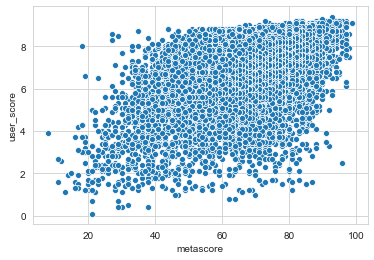

In [24]:
sns.scatterplot(df_games['metascore'], df_games['user_score'])

In [25]:
df_games[['metascore', 'user_score']].corr()

,metascore,user_score
metascore,1.000000,0.564838
user_score,0.564838,1.000000


In [26]:
#pasidarom kopijas spejimui
X = df_games['metascore'].copy()
y = df_games['user_score'].copy()

In [27]:
#pasidalinam duomenys savo modeliui
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

In [29]:
lr_model = LinearRegression()
lr_model.fit(train_X.values.reshape(-1, 1), train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
pred_y_lg = lr_model.predict(test_X.values.reshape(-1, 1))

In [34]:
df_model_res = pd.DataFrame(np.array([test_y, pred_y_lg]).T, columns=['test', 'pred_lg'])

df_model_res.head()

,test,pred_lg
0,5.9,5.044337
1,6.7,6.297546
2,4.9,6.774959
3,6.6,7.252371
4,6.5,5.581427


In [35]:
mean_absolute_error(test_y, pred_y_lg)

0.8634238311397757

In [37]:
model_dt = DecisionTreeRegressor()
model_dt.fit(train_X.values.reshape(-1, 1), train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
pred_y_dt = model_dt.predict(test_X.values.reshape(-1, 1))

In [39]:
df_model_res['pred_dt'] = pred_y_dt
df_model_res.head()

,test,pred_lg,pred_dt
0,5.9,5.044337,4.233333
1,6.7,6.297546,6.496121
2,4.9,6.774959,6.817538
3,6.6,7.252371,7.235551
4,6.5,5.581427,5.560000


In [42]:
df_model_dt = pd.DataFrame(np.array([test_y, pred_y_dt]).T, columns=['test', 'pred_dt'])

In [44]:
mean_absolute_error(test_y, pred_y_dt)

0.8547032794013406